<a href="https://colab.research.google.com/github/ClarissePansoy/CS2-A_PANSOY/blob/main/2A_PANSOY_EXER7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Data Preprocessing

In [ ]:
#1. import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import statsmodels.api as sm


data = pd.read_csv('/content/Netflix_Userbase.csv')

# 2. Encode Categorical Variables
print("Missing Values:")
print(data.isnull().sum())


data.fillna(method='ffill', inplace=True)

# 3. Encode Categorical Variables(One-Hot Encoding)
encoded_data = pd.get_dummies(data, columns=['Subscription Type', 'Country', 'Gender'], drop_first=True)

# 4. Feature Selection
selected_features = ['Age', 'Plan Duration', 'Subscription Type_Premium', 'Country_United States', 'Gender_Male']
X = encoded_data[selected_features]
y = encoded_data['Monthly Revenue']


Missing Values:
User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64


# Part 2: Exploratory Data Analysis (EDA)


In [ ]:
# 1. Descriptive Statistics
print("\nDescriptive Statistics:")
print(encoded_data.describe())

# 2. Visualizations
plt.figure(figsize=(10, 6))
sns.histplot(data['Monthly Revenue'], bins=30, kde=True, color='blue')
plt.title('Distribution of Monthly Revenue')
plt.xlabel('Monthly Revenue')
plt.ylabel('Frequency')
plt.show()

# Part 3: Linear Regression Model (Predicting Monthly Revenue)

In [ ]:
from sklearn.preprocessing import LabelEncoder
# 1. Build the Model

label_encoder = LabelEncoder()
X['Plan Duration'] = label_encoder.fit_transform(X['Plan Duration'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)

# 2. Model Evaluation
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("\nLinear Regression Model Evaluation Metrics:")
print("Mean Squared Error:", mse_linear)
print("R-squared:", r2_linear)



Linear Regression Model Evaluation Metrics:
Mean Squared Error: 2.783112416085306
R-squared: -0.007586977739601153


<ipython-input-69-86f3f2b913bb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Plan Duration'] = label_encoder.fit_transform(X['Plan Duration'])


#Part 4: Logistic Regression Model (Predicting Customer Feedback)

In [ ]:
# 1.Model Building
encoded_data['Feedback'] = np.where(encoded_data['Last Payment Date'] > '2023-03-26', 1, 0)

X_logistic = encoded_data[selected_features].copy()  # Make a copy of selected features
y_logistic = encoded_data['Feedback']
X_logistic['Plan Duration'] = label_encoder.fit_transform(X_logistic['Plan Duration'])
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(X_logistic, y_logistic, test_size=0.2, random_state=42)

model_logistic = LogisticRegression()
model_logistic.fit(X_train_logistic, y_train_logistic)
y_pred_logistic = model_logistic.predict(X_test_logistic)

# 2. Model Evaluation
accuracy_logistic = accuracy_score(y_test_logistic, y_pred_logistic)
precision_logistic = precision_score(y_test_logistic, y_pred_logistic)
recall_logistic = recall_score(y_test_logistic, y_pred_logistic)
f1_logistic = f1_score(y_test_logistic, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_test_logistic, y_pred_logistic)

print("\nLogistic Regression Model Evaluation Metrics:")
print("Accuracy:", accuracy_logistic)
print("Precision:", precision_logistic)
print("Recall:", recall_logistic)
print("F1 Score:", f1_logistic)
print("\nConfusion Matrix:")
print(conf_matrix_logistic)



Logistic Regression Model Evaluation Metrics:
Accuracy: 0.672
Precision: 0.0
Recall: 0.0
F1 Score: 0.0

Confusion Matrix:
[[336   0]
 [164   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Part 5: Comparative Analysis and Visualization


Linear Regression Coefficients:
                     Feature   Coefficient
0                        Age -8.256601e-03
1              Plan Duration  5.204170e-16
2  Subscription Type_Premium  1.355980e-01
3      Country_United States  6.102335e-02
4                Gender_Male -6.594231e-03


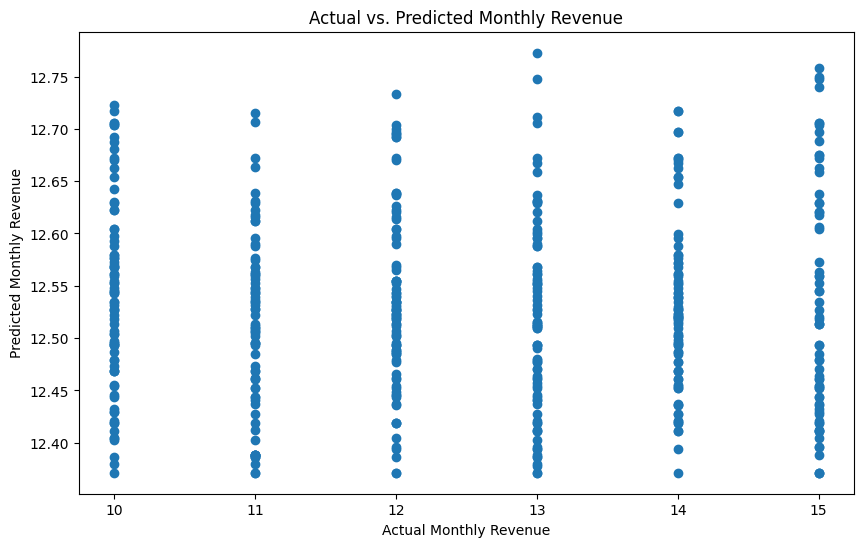

In [ ]:
# 1.Feature Importance
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model_linear.coef_})
print("\nLinear Regression Coefficients:")
print(coefficients)

# 2.Insights
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear)
plt.xlabel("Actual Monthly Revenue")
plt.ylabel("Predicted Monthly Revenue")
plt.title("Actual vs. Predicted Monthly Revenue")
plt.show()